# Linear Regression from scratch

In [6]:
import numpy as np #we are going to use numpy for matrix manipulation

In [7]:
class LinearRegressor:
    #Steps:
    
    #initialize weights
    #compute gradient
    #update weight
    #predict 
    
    def fit(self,X,y,lr=.001,epsilon=.001):
        self.weights=np.zeros(X.shape[1]+1)
        X = self.add_bias(X)
        
        while True:
            gradient=np.dot((y-self.predict(X,False)),X)
            update=lr*gradient
            self.weights=self.weights+update
            if np.max(np.absolute(update))<epsilon:
                break
    
    def predict(self,X,no_bias=True):
        if no_bias: X=self.add_bias(X)
        return np.dot(X,self.weights)
    
    def add_bias(self,X):
        return np.insert(X,0,np.ones(X.shape[0]),axis=1)

Test the model below using the diabetes dataset from sklearn

Coefficients: [152.91935705 937.19303083]
Mean squared error: 2549.26
Variance score: 0.47


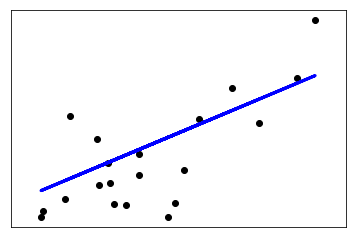

In [8]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = LinearRegressor()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients:', regr.weights)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()